## 연습문제

### EDA

1. 다음 데이터를 탐색적 분석하세요  
age : 나이, job : 직업, marital : 결혼상태, education : 학력, default : 신용 불이행 여부, balance : 은행잔고  
housing : 부동산 대출 여부, loan : 개인 대출 여부, contact : 연락 수단, month : 마지막 연락한 달  
y : 고객의 정기예금 가입 여부(종속변수)

In [ ]:
import pandas as pd

df = pd.read_csv('./data/practice1_bank.csv')
df.head()
# 기본 정보 확인
df.info()

## 결측치는 존재하지 않고 질적변수가 job, marital, education, default, housing, loan, contact, month, y 이다.
## 양적변수는 age, balance 이다.
# 기술 통계량 확인
df.describe(include=['int64'])
# 기술 통계량 확인
df.describe(include=['object'])

## 대부분의 사람이 신용불량자가 아님을 알 수 있다.
qual = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']
quan = ['age', 'balance']

# 질적변수 시각화
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize = (15, 10))
plt.subplots_adjust(wspace= 0.5, hspace= 0.5)

for i, col in enumerate(qual):
    axes[i // 3, i % 3].barh(df[col].value_counts().index, df[col].value_counts().values)
    axes[i // 3, i % 3].set_title(col)
# 양적변수 시각화
fig, axes = plt.subplots(2, 2, figsize = (15, 10))
plt.subplots_adjust(wspace= 0.5, hspace= 0.5)

for i, col in enumerate(quan):
    axes[i, 0].hist(df[col])
    axes[i, 1].boxplot(df[col], vert = False)
    axes[i, 0].set_title(col)
    axes[i, 1].set_title(col)

2. 어느 회사의 연도별 임금상승률이다. 평균 임금상승률을 구하기 위해 어떤 대표값을 설정해야하는가?  
data = [0.04, 0.04, 0.05, 0.10, 0.08]

In [ ]:
from scipy.stats.mstats import gmean

data = [0.04, 0.03, 0.05, 0.10, 0.08]
data1 = [1+x for x in data]
gmean(data1) - 1

# 평균 임금상승률은 5.9%

3. 출근할 때 시속 3km/h, 퇴근할 때 시속 6km/h 일 때 평균속도를 구하라

In [ ]:
# 평균속도를 구할 때는 조화평균을 사용한다.
from scipy.stats.mstats import hmean

hmean([3, 6]) # 평균속도는 4km/h

4. A = [200, 49], B = [190, 36] 방금 구매한 A, B 물품이 모두 210 이라면 상대적으로 어느 것이 더 무거운가? [평균, 분산]

In [ ]:
# 표준화한 점수로 비교하자.

import numpy as np
z1 = (210-200) / np.sqrt(49)
z2 = (210-190) / np.sqrt(36)

z1, z2 # z2 가 더 크므로 z2가 상대적으로 더 무겁다.

5. A = [10, 1], B = [8, 1] A와 B 중 어느 것의 용돈 격차가 더 심한가? [평균, 표준편차]

In [ ]:
# 변동계수를 이용해 단위가 다른 두 집단의 차이를 비교
a = 2 / 10
b = 1 / 8

a, b # a가 변동계수가 더 크므로 a가 용돈 격차가 더 심하다.

### 전처리

1. 데이터의 결측치와 이상치를 확인하고 합리적인 전처리를 진행하라

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/practice1_bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,month,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,no
...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,jul,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,may,no
4518,57,technician,married,secondary,no,295,no,no,cellular,aug,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,feb,no


In [30]:
# 결측치 확인
df.info() # 결측치는 없는 것으로 보임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   month      4521 non-null   object
 10  y          4521 non-null   object
dtypes: int64(2), object(9)
memory usage: 388.6+ KB


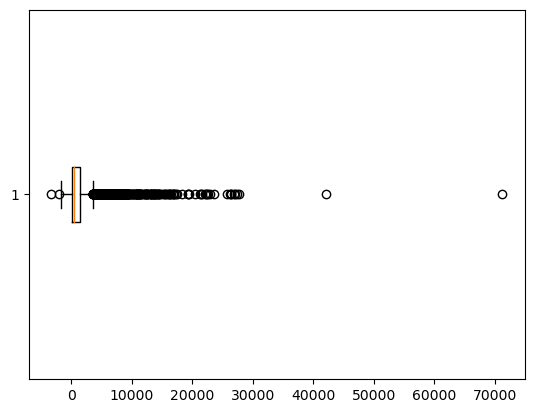

In [31]:
# 양적변수인 balance 의 데이터 분포를 확인하자.
plt.boxplot(df.balance, vert = False)
plt.show()

# 이상치로 보이는 데이터가 존재한다.
# IQR 방식으로 이상치를 확인해보자.

In [33]:
IQR = df.balance.quantile(0.75) - df.balance.quantile(0.25)
top = df.balance.quantile(0.75) + 1.5*IQR
down = df.balance.quantile(0.25) - 1.5*IQR

# 이상치 값 찾기
outlier = df[(df.balance > top) | (df.balance < down)]
outlier.balance

1       4789
10      9374
16      4073
25      5883
30      4189
        ... 
4464    4554
4473    4790
4489    6945
4500    4196
4517   -3313
Name: balance, Length: 506, dtype: int64

In [ ]:
# 이상치 처리하기
## 위에서 정의한 top, down 을 벗어나는 데이터를 top, down 으로 이동해준다.
top_index = df[(df.balance > top)].balance.index
down_index = df[(df.balance < down)].balance.index
df.loc[top_index, 'balance'] = np.nan
df.loc[top_index, 'balance'] = top
df.loc[down_index, 'balance'] = np.nan
df.loc[down_index, 'balance'] = down

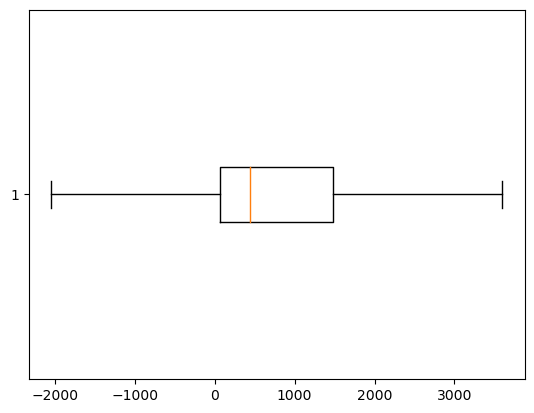

In [28]:
# balance 의 데이터 분포를 다시 확인하자.
plt.boxplot(df.balance, vert = False)
plt.show()

# 이상치가 사라졌음을 알 수 있다.

2. 범주형 변수를 전처리 하는 방법을 2가지 이상 설명하고, 각 범주형 변수에 대한 적절한 전처리를 진행하세요

레이블 인코딩
+ 문자열인 수준들을 숫자로 매핑하는 변수변환이다. 서열척도 변수에 사용한다.

더미코딩
+ 범주형 변수의 수준의 개수보다 한 개 적게 변수를 만들어서 다중공선성을 방지하도록 가변수를 만드는 방법이다.
+ 수준이 너무 많게 되면 특징의 개수도 많아져서 학습 시간이나 메모리가 급증할 수 있다.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   month      4521 non-null   object
 10  y          4521 non-null   object
dtypes: int64(2), object(9)
memory usage: 388.6+ KB


In [36]:
df.describe(include= 'object')

,job,marital,education,default,housing,loan,contact,month,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,2
top,management,married,secondary,no,yes,no,cellular,may,no
freq,969,2797,2306,4445,2559,3830,2896,1398,4000


In [37]:
df['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [38]:
# 변수 수준들에 서열이 있는 경우 레이블 인코딩을 사용하고 서열이 없는 경우 더미코딩을 사용하자.
## 레이블 인코딩
col1 = ['default', 'housing', 'loan', 'y']
for col in col1:
    df[col] = df[col].map({'yes' : 1, 'no' : 0})

df['education'] = df['education'].map({'unknown' : 0, 'primary' : 1, 'secondary' : 2, 'tertiary' : 3})

## 더미코딩
df = pd.get_dummies(df, columns= ['job', 'marital', 'contact', 'month'], drop_first= True)

df.head()

,age,education,default,balance,housing,loan,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,1,0,1787,0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,33,2,0,4789,1,1,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,35,3,0,1350,1,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,3,0,1476,1,1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,59,2,0,0,1,0,0,True,False,False,...,False,False,False,False,False,False,True,False,False,False


3. 수치형 변수를 전처리 하는 방법을 2가지 이상 설명하고, 각 수치형 변수에 대한 적절한 전처리를 진행하세요

표준화 스케일링
+ 각 특성별로 표준점수를 구하는 변수변환 방법으로 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 한다.
+ 표준점수인 z는 원수치인 x가 평균에서 얼마나 떨어져 있는지를 나타내고 음수이면 평균이하, 양수이면 평균 이상이다.

최대최소 스케일링
+ 모든 특성이 정확하게 0과 1 사이에 위치하도록 데이터를 변경하는 방법이다.
+ 변환 후의 평균이 정확히 0이 됮 않고 이상치의 영향을 받기 쉽다.

표준화 스케일링 방법을 이용하자.

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['balance'] = scaler.fit_transform(df[['balance']])

df.head()

,age,education,default,balance,housing,loan,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,1,0,0.121072,0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,33,2,0,1.118644,1,1,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,35,3,0,-0.024144,1,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,3,0,0.017726,1,1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,59,2,0,-0.472753,1,0,0,True,False,False,...,False,False,False,False,False,False,True,False,False,False


4. 해당 데이터에 클래스 불균형이 있는지 확인하고 그렇게 생각한 이유를 작성하세요.

In [44]:
df['y'].value_counts()

y
0    4000
1     521
Name: count, dtype: int64

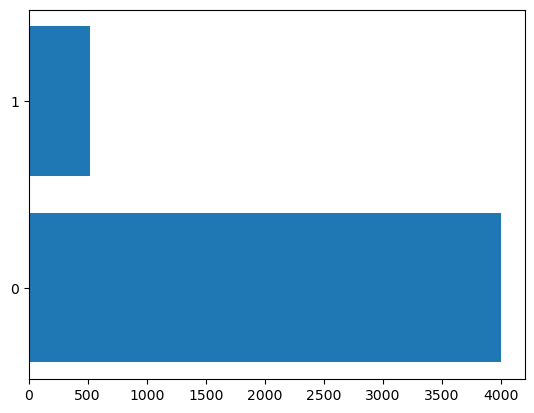

In [48]:
plt.barh(df['y'].value_counts().index,df['y'].value_counts().values)
plt.yticks(df['y'].value_counts().index)
plt.show()

# 종속변수 y 의 값 분포가 비율 차이가 약 8배 정도 나므로 클래스 불균형이 존재한다.

5. 클래스 불균형이 있는 데이터를 처리하는 방법들 중 2가지를 들어 그 방법의 장단점을 서술하고 그 중 하나를 선택하여 전처리를 진행하라

오버샘플링
+ 데이터 세트의 균형을 맞추기 위해 소수 클래스의 데이터를 다수 클래스의 데이터 수 만큼 만드는 것이다.
+ 대표적으로 랜덤 오버 샘플링과 SMOTE 이 있다.
+ 랜덤 오버샘플링은 단순 복제로 소수 클래스의 데이터 양을 늘리는 것으로 과적합의 위험이 있다.
+ SMOTE 는 KNN 알고리즘을 사용해 K개의 중간 지점에 데이터를 생성하는 것으로 오버피팅의 위험이 적지만 새로운 데이터나 작은 데이터 세트에는 사용하기 어렵다.

언더샘플링
+ 데이터 세트의 균형을 맞추기 위해 다수 클래스를 소수 클래스 수로 줄이는 것이다.
+ 대표적으로 랜덤언더샘플링이 있다.
+ 언더샘플링을 하게 되면 데이터의 정보가 손실되기 때문에 과소적합의 위험이 있으며 설명력이 떨어질 수 있다.

해당 데이터는 크기가 크지 않으므로 정보 손실의 우려로 오버샘플링이 적절하다.

In [51]:
from imblearn.over_sampling import SMOTE

X = df.drop(['y'], axis = 1)
y = df['y']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3 , random_state= 42)
sm = SMOTE()
X_sm_train, y_sm_train = sm.fit_resample(X_train, y_train)

print(y_train.value_counts())
print(y_sm_train.value_counts())

y
0    2799
1     365
Name: count, dtype: int64
y
0    2799
1    2799
Name: count, dtype: int64


### 표본추출, 데이터 분할, 교차검증

1. 랜덤포레스트 알고리즘의 파라미터 max_depth 의 후보 4개를 토대로 교차분석을 진행하고 그 결과를 표로 나타내시오

In [52]:
df = pd.read_csv('./data/practice1_bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,no


In [54]:
# 변수 인코딩을 실시하자.
# 변수 수준들에 서열이 있는 경우 레이블 인코딩을 사용하고 서열이 없는 경우 더미코딩을 사용하자.
## 레이블 인코딩
col1 = ['default', 'housing', 'loan', 'y']
for col in col1:
    df[col] = df[col].map({'yes' : 1, 'no' : 0})

df['education'] = df['education'].map({'unknown' : 0, 'primary' : 1, 'secondary' : 2, 'tertiary' : 3})

## 더미코딩
df = pd.get_dummies(df, columns= ['job', 'marital', 'contact', 'month'], drop_first= True)

df.head()

,age,education,default,balance,housing,loan,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,1,0,1787,0,0,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,33,2,0,4789,1,1,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,35,3,0,1350,1,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,3,0,1476,1,1,0,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,59,2,0,0,1,0,0,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X = df.drop(['y'], axis = 1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state= 42)

rf_clf = RandomForestClassifier()
param_grid = {'max_depth' : [3,4,5,6]}

grid_rf = GridSearchCV(rf_clf, param_grid, cv = 5)
grid_rf.fit(X_train, y_train)

print(grid_rf.best_params_)
pd.DataFrame(grid_rf.cv_results_)

{'max_depth': 3}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.132085,0.002757,0.001564,0.001999,3,{'max_depth': 3},0.884676,0.884676,0.884676,0.884676,0.884494,0.884640,0.000073,1
1,0.133838,0.008678,0.003075,0.003235,4,{'max_depth': 4},0.884676,0.884676,0.884676,0.884676,0.884494,0.884640,0.000073,1
2,0.146015,0.002881,0.006334,0.004259,5,{'max_depth': 5},0.884676,0.884676,0.884676,0.883096,0.884494,0.884324,0.000618,3
3,0.149972,0.001527,0.005947,0.005835,6,{'max_depth': 6},0.884676,0.883096,0.884676,0.883096,0.884494,0.884008,0.000747,4


### 확률분포

1. 어느 사격선수가 과녁의 정중앙을 맞힐 확률이 80%라고 한다. 이 선수가 총 5번 사격을 할 때 평균적으로 몇번 정중앙을 맞히는지 구하시오.

In [63]:
# 이항분포 분포
from scipy.stats import binom
binom.stats(5, 0.8) # 평균 4번

(4.0, 0.7999999999999998)

2. 전체 청소년의 40%가 11시 이전에 잠을 잔다고 하면, 임의로 선택한 10명의 청소년 중에 3명이 11시 이전에 잠을 잘 확률을 계산하시오

In [70]:
# 이항분포
# 분포함수(누적확률질량함수)
binom.pmf(3, 10, 0.4)

0.21499084799999976

3. 어느 아파트 단지에서 밤 11시부터 새벽 2시 사이에 배달되는 음식 배달 건수는 시간 당 평균 5건이다.  
    음식 배달 건수의 분포가 푸아송분포를 따른다면 오늘 새벽 12시와 1시 사이에 배달이 1건만 발생할 확률을 구하라

In [69]:
x = 1
lam = 5

from scipy.stats import poisson

poisson.pmf(x, lam)

0.03368973499542734

4. A 대학교 B전공 시험의 성적 분포는 평균이 65, 표준편차 12인 정규분포를 따른다.  
    최고 점수부터 10% 까지를 A+로 분류한다면, A+ 를 받기 위해 최소 몇점을 받아야 하는가?
    

In [68]:
from scipy.stats import norm
z = norm.ppf(0.9)
# (x-65) / 12 = norm.ppf(0.9)
z * 12 + 65 # 81점

80.3786187865352

### 추정과 가설검정

1. 다음 데이터의 모분산 정보가 없을 때, 다음 데이터의 모평균에 대한 95% 신뢰수준의 신뢰구간을 구하시오. 또한, 다음 데이터의 모표준편차가 3이라는 것을 알고 있을 때, 다음 데이터의 모평균에 대한 95% 신뢰수준의 신뢰구간을 구하시오.

data = [10, 19, 15, 11, 13, 14, 18]

In [10]:
data = [10, 19, 15, 11, 13, 14, 18]

# 모분산 정보가 없을 때
import numpy as np
from scipy.stats import t, norm

x = np.mean(data) # 표본평균
n = len(data) # 표본 크기
s = np.std(data, ddof = 1) # 표본표준편차
conf_a = 0.05
df = n-1

SE = s / np.sqrt(n)
conf_t = t.ppf(1 - conf_a/2, df)
ME = conf_t*SE

print('신뢰구간 {} ~ {}'.format(x-ME, x+ME))

# 모분산 정보가 있을 때
sigma = 3
conf_z = norm.ppf(1-conf_a/2)
SE = sigma / np.sqrt(n)
ME = conf_z * SE

print('신뢰구간 {} ~ {}'.format(x-ME, x+ME))

신뢰구간 11.185329064313652 ~ 17.38609950711492
신뢰구간 12.063324022113047 ~ 16.508104549315526


2. 어느 제조회사의 불량률이 5%로 알려져 있다면, 95% 신뢰수준에서 오차의 한계가 3%가 되도록 하는 최소표본 사이즈를 구하시오.

In [11]:
p = 0.05

ME = 0.03
conf_a = 0.05
zstats = norm.ppf(1-conf_a/2)
# SE = np.sqrt(p*(1-p) / n)

# ME < zstats*SE

size = p*(1-p)*zstats**2 / ME**2 # 203개

202.74365998107885

3. 임의로 추출한 표본 30개의 분산을 계산했더니 50일 때, 신뢰도 95%로 모분산의 신뢰구간을 추정하시오.

In [17]:
from scipy.stats import chi2
n = 30
v = 50
df = n-1
conf_a = 0.05

conf_c1 = chi2.ppf(1-conf_a/2, df)
conf_c2 = chi2.ppf(conf_a/2, df)

CI1 = df * v / conf_c1
CI2 = df * v / conf_c2

print('신뢰구간 {:.2f} ~ {:.2f}'.format(CI1, CI2))

신뢰구간 31.71 ~ 90.36


4. 어느 뽑기 기계에서 20번 뽑기를 했더니 5개가 미니카였다. 해당 뽑기 기계에 있는 장난가들 중 미니카의 비율을 P라고 하면, 모비율 P에 대한 95% 신뢰구간을 구하시오.

In [18]:
p = 5 / 20 # 표본비율
n = 20

conf_a = 0.05
zstats = norm.ppf(1-conf_a/2)
SE = np.sqrt(p*(1-p) / n)
ME = zstats * SE

print('신뢰구간 {} ~ {}'.format(p-ME, p+ME))

신뢰구간 0.060227303217750994 ~ 0.439772696782249


5. A 국가의 성인 남성의 흡연율이 35% 라고 발표하였으나 B는 그것보다 더 높은 수치를 예상했다. 이에 성인 남성 중 450명을 임의 추출하여 조사한 결과 180명이 흡연자인 것을 확인하였다. 이에 대하여 귀무가설과 대립가설을 세우고, 검정통계량을 계산하여 검정 결과를 서술하시오.

In [20]:
# H0 : 성인 남성의 흡연율이 35% 이다.
# H1 : 성인 남성의 흡연율이 35% 보다 크다.
# 단측 검정
n = 450
p = 180 / 450 # 표본비율
p0 = 0.35
test_a = 0.05

SE = np.sqrt(p0*(1-p0) / n)
zstats = (p - p0) / SE

sp = 1-norm.cdf(zstats)
cv = norm.ppf(1-test_a)

print('임계값 : {}, 검정통계량 : {}'.format(cv, zstats))
print('유의수준 :{}, 유의확률 :{}'.format(test_a, sp))

# 유의확률이 유의수준 0.05보다 작으므로 귀무가설을 기각. 즉 성인 남성의 흡연율이 35% 보다 크다.

임계값 : 1.6448536269514722, 검정통계량 : 2.2237479499833053
유의수준 :0.05, 유의확률 :0.013082703570710397


6. 모평균을 모르는 상황에서 표본의 정보를 통해 모분산이 10인지 아닌지 여부를 검정하고자 한다. 50개의 표본을 임의로 추출하여 계산한 결과 표본의 분산은 8.8로 나타났다. 이에 대해 귀무가설과 대립가설을 세우고, 검정통계량을 계산하여 검정 결과를 서술하시오. (유의수준 0.05)

In [21]:
# H0 : 모분산이 10이다.
# H1 : 모분산이 10이 아니다.

from scipy.stats import chi2
n = 50
v = 8.8
df = n-1
v0 = 10
test_a = 0.05

cstats = df*v / v0

if chi2.cdf(cstats, df) < 0.5:
    sp = chi2.cdf(cstats, df)*2
else:
    sp = (1-chi2.cdf(cstats, df))*2

cv1 = chi2.ppf(test_a /2, df)

0.29066626821562375

### 비모수 검정

1. 아래 그래프는 A, B, C 동별 입주민의 주민대표 찬반 투표 결과를 나타낸다. 동별 찬반 비율이 동일한 지 귀무가설과 대립가설을 설정하고, 검정 통계량을 계산하여 검정하시오. (유의수준 0.05)

In [9]:
import pandas as pd
table = pd.DataFrame([[50, 60, 65], [45, 32, 55]], columns= ['A', 'B', 'C'], index = ['찬성', '반대'])
print(table)

# H0 : 동별 찬반 비율이 동일하다.
# H1 : 동별 찬반 비율이 동일하지 않다.

# 동질성 검정을 실시하자.
from scipy.stats import chi2_contingency

# chi2_contingency(table)
statistic, pvalue, df, expect = chi2_contingency(table)
print('검정통계량 :', statistic)
print('p-value :', pvalue)

# pvalue 가 유의수준 0.05보다 크므로 귀무가설을 기각할 수 없다. 즉 동별 찬반 비율이 동일하다.

     A   B   C
찬성  50  60  65
반대  45  32  55
검정통계량 : 3.6673765482546967
p-value : 0.1598230083055444


2. 특정 캠페인에 노출되기 전과 후의 캠페인 주제에 대한 지지 여부를 기록한 데이터이다. 캠페인 전후의 지지 비율이 차이가 있는지 귀무가설과 대립가설을 설정하고, 검정통계량을 계산하여 검정하시오.


In [16]:
data = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice6_ba.csv', index_col= 0)
print(data)

    before  after
0        1      0
1        1      1
2        1      1
3        0      1
4        1      0
5        0      1
6        1      0
7        1      1
8        0      0
9        1      0
10       1      0
11       0      1
12       0      1
13       0      1
14       0      1
15       0      0
16       0      0
17       1      0
18       1      0
19       1      1
20       0      1
21       1      1
22       0      1
23       0      1
24       0      1
25       1      1
26       1      0
27       1      0
28       0      1
29       0      1
30       0      0


In [20]:
# 정규성 검정
from scipy.stats import shapiro

# 정규성 검정의 가설검정
# H0 : 데이터의 분포가 정규성을 만족한다.
# H1 : 데이터의 분포가 정규성을 만족하지 않는다.
print(shapiro(data['before'] - data['after']))

# pvalue 가 0.05보다 크므로 귀무가설을 기각할 수 없다. 즉 데이터의 분포가 정규성을 만족한다.

# 정규성을 만족하므로 대응표본 T 검정을 실시한다.
# H0 : 켐페인 전후의 지지 비율이 같다.
# H1 : 켐페인 전후의 지지 비율이 다르다.

from scipy.stats import ttest_rel

ttest_rel(data['before'], data['after'], alternative='two-sided')

# p-value 가 0.05보다 크므로 귀무가설을 기각할 수 없다. 즉 켐페인 전후의 지지 비율이 같다고 할 수 있다.

ShapiroResult(statistic=0.7896208763122559, pvalue=3.335928340675309e-05)


TtestResult(statistic=-0.6485065517506755, pvalue=0.5215908504704979, df=30)

In [ ]:
# pvalue 가 0.05보다 작으므로 귀무가설을 기각한다. 즉 데이터의 분포가 정규성을 만족하지 않는다.

# 정규성을 만족하지 않으므로 윌콕슨 부호검정을 실시한다.
# H0 : 켐페인 전후의 지지 비율이 같다.
# H1 : 켐페인 전후의 지지 비율이 다르다.

from scipy.stats import wilcoxon

wilcoxon(data['before'], data['after'])

# p-value 가 0.05보다 크므로 귀무가설을 기각할 수 없다. 즉 켐페인 전후의 지지 비율이 같다고 할 수 있다.

3. 다음의 T와 F가 무작위로 나열되어 있다고 불 수 있는지 귀무가설과 대립가설을 설정하고, 검정통계량을 계산하여 검정하시오.

In [24]:
data = [1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1]

# 일표본 Run 검정을 실시한다.
# H0 : 0, 1이 무작위로 나열되어 있다.
# H1 : 0, 1이 무작위로 나열되어 있지 않다.

from statsmodels.sandbox.stats.runs import runstest_1samp

statistic, pvalue = runstest_1samp(data)
print('검정통계량 :', statistic)
print('p-value :', pvalue)

# p-value 가 0.05보다 작으므로 귀무가설을 기각한다. 즉 무작위로 나열되어 있지 않다.

검정통계량 : 2.1866069605669876
p-value : 0.028771228782561286


4. 20대보다 30대가 기대하는 연봉상승률이 더 높다는 주장이 있다. 이 주장이 타당한지를 확인해보기 위해서 20대 10명과 30대 8명을 임의로 추출하여 기대하는 연봉상승률을 다음과 같이 정리하였다. 이 주장을 검정하기 위한 귀무가설과 대립가설을 설정하고, 검정통계량을 계산하여 검정하시오.

In [59]:
A = [3.0, 3.5, 2.0, 2.8, 5.0, 0, 2.3, 2.8, 3.3, 3.5]
B = [3.5, 5.5, 5.0, 5.0, 10.0, 8.0, 2.5, 3.0]

# 데이터의 정규성을 검정하자.
# H0 : 정규분포를 만족한다.
# H1 : 정규분포를 만족하지 않는다.

print(shapiro(A))
print(shapiro(B))

# A, B 모두 pvalue 가 0.05보다 크므로 귀무가설을 기각할 수 없다. 즉 정규성을 만족한다.

# 등분산성을 검정하자.
# H0 : 등분산성을 만족한다.
# H1 : 등분산성을 만족하지 않는다.

from scipy.stats import levene

levene(A, B)

# pvalue 가 0.05보다 크므로 귀무가설을 기각할 수 없다. 즉 등분산성을 만족한다.

# 독립표본 T 검정을 실시하자.
# H0 : 20대, 30대의 연봉상승률이 같다.
# H1 : 20대, 30대의 연봉상승률이 30대가 더 크다.
from scipy.stats import ttest_ind

ttest_ind(A, B, equal_var = True, alternative='less') 

# pvalue가 0.05보다 작으므로 귀무가설을 기각한다. 즉 20대, 30대의 연봉상승률이 30대가 더 크다.

ShapiroResult(statistic=0.9171079993247986, pvalue=0.33346471190452576)
ShapiroResult(statistic=0.9105510115623474, pvalue=0.35795992612838745)


Ttest_indResult(statistic=-2.6954739912264585, pvalue=0.007959429891479889)

5. 양식, 한식, 중식에 대해 5명의 선호도를 나타내는 표이다. '선호하지 않는다' 를 1, '보통이다' 를 2, '선호한다' 를 3으로 응답하였다. 음식 종류에 따라 선호도 차이가 있는지 귀무가설과 대립가설을 설정하고, 검정 통계량을 계산하여 검정하시오.

In [64]:
data = pd.DataFrame([[1,3,1,3,1], [1,3,3,1,1], [2,3,3,3,1]], columns = ['A', 'B', 'C','D','E'], index = ['양식', '한식', '중식']).T
print(data)

# 동질성 검정
# H0 : 음식 종류 별 선호도 차이가 없다.
# H1 : 음식 종류 별 선호도 차이가 있다.
chi2_contingency(data)

# p-value 가 0.05보다 크므로 귀무가설을 기각할 수 없다. 즉 선호도 차이가 없다.


   양식  한식  중식
A   1   1   2
B   3   3   3
C   1   3   3
D   3   1   3
E   1   1   1


Chi2ContingencyResult(statistic=2.341269841269841, pvalue=0.9687222421496073, dof=8, expected_freq=array([[1.2, 1.2, 1.6],
       [2.7, 2.7, 3.6],
       [2.1, 2.1, 2.8],
       [2.1, 2.1, 2.8],
       [0.9, 0.9, 1.2]]))

6. 임의로 추출한 A, B, C 지역 학생들의 키가 다음과 같다. 지역별 학생들의 키가 차이가 있는지 검정하기 위한 귀무가설과 대립가설을 설정하고, 검정통계량을 계산하여 검정하시오.

In [65]:
A = [177,167,188,189,152,159,184,175]
B = [151,177,150,187,167,166,179,161,174]
C = [173,151,156,182,188,175,150,165,176,183]

# 각 지역의 학생들의 키가 정규분포를 띄는지 확인하자.
print(shapiro(A))
print(shapiro(B))
print(shapiro(C))

# 모든 집단이 정규성을 만족한다.
# 등분산성을 만족하는지 확인하자.

levene(A, B, C)

# 등분산성을 만족하지 않는다.
# 정규성은 만족하고 등분산성을 만족하지 않으므로 welch's ANOVA 분석을 실시하자.

from statsmodels.stats.oneway import anova_oneway

df = data.melt().dropna()
anova_oneway(data = df.value, groups = df.variable, use_var = 'unequal')

# p-value 가 0.05보다 크므로 귀무가설을 기각하지 않는다. 평균이 같다고 할 수 있다.

ShapiroResult(statistic=0.9315201640129089, pvalue=0.5300142765045166)
ShapiroResult(statistic=0.9561489820480347, pvalue=0.7572823166847229)
ShapiroResult(statistic=0.9159915447235107, pvalue=0.32473188638687134)


<class 'statsmodels.stats.base.HolderTuple'>
statistic = 0.592941176470588
pvalue = 0.5754904115781195
df = (2.0, 7.919191919191919)
df_num = 2.0
df_denom = 7.919191919191919
nobs_t = 15.0
n_groups = 3
means = array([1.8, 2.4, 1.8])
nobs = array([5., 5., 5.])
vars_ = array([1.2, 0.8, 1.2])
use_var = 'unequal'
welch_correction = True
tuple = (0.592941176470588, 0.5754904115781195)

### 공분산과 상관계수

1. 어느 고등학교에서 임의로 추출한 9명의 학생들의 수학과 영어 성적이 다음과 같다. 다음 학생들의 성적에 대한 피어슨 상관계수와 스피어만 순위상관계수를 구하고, 각 상관계수가 통계적으로 유의한지 여부를 확인하시오. 해당 피어슨 상관계수의 신뢰수준 90% 의 신뢰구간을 계산하시오.

In [75]:
math = [96,93,63,89,85,84,66,62,90]
eng = [98,90,74,84,69,69,73,61,98]

data = pd.DataFrame([math, eng], index = ['math', 'eng']).T

data.corr(method = 'spearman')

from scipy.stats import spearmanr, pearsonr

print(spearmanr(math, eng))
print(pearsonr(math, eng))

# 두 계수모두 통계적으로 유의함.

SignificanceResult(statistic=0.8151548326115373, pvalue=0.007423781373494626)
PearsonRResult(statistic=0.7454392939220784, pvalue=0.021141520899581337)


2. 두 변수 X, Y 의 표준편차는 각각 4,5 이고 공분산이 4인 경우, 두 변수의 상관계수를 구하시오.

In [77]:
xs, ys = 4, 5
cov = 4
cov / 4*5

5.0

### 회귀분석

1. 다음은 인도 벵갈루루의 집값 데이터이다. 데이터는 집의 특징을 나타내는 입력 변수들과 집값의 출력 변수로 구성되어 있다. 선형 회귀분석을 수행하시오.

In [95]:
data = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice8_BHP2.csv')
data

X = data.drop(['price'], axis = 1)
y = data['price']

import statsmodels.api as sm

X = pd.get_dummies(data = X, columns = ['area_type'], drop_first= True)
X = sm.add_constant(X)

from sklearn.linear_model import LinearRegression

lr = sm.OLS(y, X)
lr_fit = lr.fit()

lr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     1017.
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:29:27   Log-Likelihood:                -42786.
No. Observations:                7495   AIC:                         8.559e+04
Df Residuals:                    7486   BIC:                         8.565e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -59.2399      3.826    -15.483      0.000     -66.740     -51.739
availability        -2.2666      2.052     -1.104      0.269      -6.290       1.757
size                -1.2000      1.051     -1.142      0.254      -3.261       0.861
total_sqft           0.0536      0.001     45.532      0.000       0.051       0.056
bath                32.5548      1.766     18.429      0.000      29.092      36.018
balcony             -0.8327      1.168     -0.713      0.476      -3.122       1.457
area_type_Carpet    -0.8348     10.371     -0.080      0.936     -21.166      19.496
area_type_Plot      82.9016      5.183     15.994      0.000      72.741      93.062
area_type_Super      0.4783      2.375      0.201      0.840      -4.176       5.133
==============================================================================
Omnibus:                     9791.187   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25193500.073
Skew:                           6.314   Prob(JB):                         0.00
Kurtosis:                     286.749   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2. 앞선 모델에서 변수 area_type 과 total_sqft 의 교호작용 항을 추가하여 회귀분석을 수행하시오.

In [97]:
X['area_type_Carpet * total_sqft'] = X['area_type_Carpet'] * X['total_sqft']
X['area_type_Plot * total_sqft'] = X['area_type_Plot'] * X['total_sqft']
X['area_type_Super * total_sqft'] = X['area_type_Super'] * X['total_sqft']

lr = sm.OLS(y, X)
lr_fit = lr.fit()

print(lr_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     898.3
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:29:59   Log-Likelihood:                -42389.
No. Observations:                7495   AIC:                         8.480e+04
Df Residuals:                    7483   BIC:                         8.488e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

3. 앞선 모델에서 변수 total_sqrf 의 이차항을 추가하여 회귀분석을 수행하시오.

In [98]:
X['total_sqft^2'] = X['total_sqft'] * X['total_sqft']

lr = sm.OLS(y, X)
lr_fit = lr.fit()

print(lr_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1261.
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:30:14   Log-Likelihood:                -41397.
No. Observations:                7495   AIC:                         8.282e+04
Df Residuals:                    7482   BIC:                         8.291e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

4. 앞선 모델에서 변수 선택 과정을 거쳐 최종 모델을 완성하고 결과를 해석하시오.

In [100]:
# 변수 중에서 p 값이 0.05보다 작은 변수가 통계적으로 유의한 변수이므로 선택하자.
# 제거할 변수 : bath, area_type_Plot

X = X.drop(['bath', 'area_type_Plot'], axis = 1)

lr = sm.OLS(y, X)
lr_fit = lr.fit()

print(lr_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1514.
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:31:50   Log-Likelihood:                -41398.
No. Observations:                7495   AIC:                         8.282e+04
Df Residuals:                    7484   BIC:                         8.289e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### 지도 학습 알고리즘

1. 다음은 인도 벵갈루루의 집값 데이터이다. 데이터는 집의 특징을 나타내는 입력 변수들과 집값의 출력 변수로 구성되어 있다. 3개의 알고리즘을 선택하여 회귀 모델을 생성하고 알고리즘의 장단점과 성능을 비교하시오.

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice8_BHP2.csv')
data

,area_type,availability,size,total_sqft,bath,balcony,price
0,Super,0,3,1056.0,2,1,39.07
1,Plot,1,6,2600.0,5,3,120.00
2,Super,1,5,1521.0,3,1,95.00
3,Super,1,3,1170.0,2,1,38.00
4,Plot,1,6,2785.0,5,3,295.00
...,...,...,...,...,...,...,...
7490,Super,1,5,1345.0,2,1,57.00
7491,Super,1,5,1715.0,3,3,112.00
7492,Built-up,1,8,3453.0,4,0,231.00
7493,Built-up,1,3,1141.0,2,1,60.00


DecisionTree
+ 장점 : 계산 비용이 낮고, 모델 해석이 쉽고 모델 시각화할 수 있어 이해가 쉽다. 또한 트리 구조의 특징으로써 스케일에 영향을 받지 않고 이상치나 결측치에 잘 대처한다.
+ 단점 : 필요없더라도 모든 특성들을 사용하기 때문에 과적합의 위험이 있다. 학습된 모델이 가진 데이터 범위 밖의 데이터를 가져오면 예측하기 어렵다.

RandomForest
+ 장점 : 병렬로 실행이 가능하고, 피처의 개수가 적어 계산 비용이 낮다. 또한 매개변수 튜닝을 많이 하지 않아도 잘 작동하며 데이터의 스케일을 맞출 필요도 없다.
+ 단점 : 결과에 대한 직관적인 해석은 불가능하고 고차원의 희소한 데이터에는 잘 작동하지 않는다.

SVM
+ 장점 : 데이터의 특성이 적더라도 복잡한 결정경계를 만들 수 있다. 저차원과 고차원의 데이터에 모두 잘 작동한다.
+ 단점 : 대용량 데이터에서는 잘 작동하지 않고, 스케일링 등 전처리에 영향을 많이 받는다. 모델을 이해하기 어렵다.

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

X = data.drop(['price'], axis = 1)
y = data['price']

X = pd.get_dummies(X, columns = ['area_type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
svr = SVR(C = 1000, gamma = 0.1)

dt.fit(X_train, y_train)
rf.fit(X_train ,y_train)
svr.fit(X_train, y_train)

print('dt r2 :', dt.score(X_test, y_test))
print('rf r2 :', rf.score(X_test, y_test))
print('svr r2 :', svr.score(X_test, y_test))

# 변수를 튜닝하지 않고 기본 모델을 사용하였을 경우 RandomForestRegressor 가 R2 score 기준으로 가장 성능이 좋게 나왔다.

dt r2 : 0.45156447305007874
rf r2 : 0.7045505974717876
svr r2 : 0.49107898956088747


2. price 변수의 중앙값을 기준으로 그 이상이면 높음, 미만이면 낮음으로 이분변수 'level' 을 생성하시오.

In [15]:
data['level'] = data['price'].apply(lambda x : '높음' if x >= data['price'].median() else '낮음')
data.head()

,area_type,availability,size,total_sqft,bath,balcony,price,level
0,Super,0,3,1056.0,2,1,39.07,낮음
1,Plot,1,6,2600.0,5,3,120.00,높음
2,Super,1,5,1521.0,3,1,95.00,높음
3,Super,1,3,1170.0,2,1,38.00,낮음
4,Plot,1,6,2785.0,5,3,295.00,높음


3. 앞서 생성한 이분변수 level 을 출력 변수로 할 때, 2개의 알고리즘을 선택하여 분류 모델을 생성하고 알고리즘의 장단점과 성능을 비교하시오.

KNN 분류
+ 장점 : 이해하기 쉬운 모델로 많이 조정하지 않아도 좋은 성능을 발휘한다. 
+ 단점 : 데이터 전처리의 과정이 중요하고 특성이 많은 데이터셋에는 잘 동작하지 않는다. 알고리즘의 이해는 쉽지만 예측이 느리다.

나이브베이즈분류
+ 훈련과 예측 속도가 빠르고 훈련 과정을 이해하기 쉽다. 희소한 고차원 데이터에서 잘 작동하며 비교적 매개변수에 민감하지 않다.
+ 단점 : 일반화 성능이 떨어질 수 있다.

다층퍼셉트론 분류
+ 

In [17]:
data['level'] = data['level'].map({'높음' : 1, '낮음' : 0})
data

,area_type,availability,size,total_sqft,bath,balcony,price,level
0,Super,0,3,1056.0,2,1,39.07,0
1,Plot,1,6,2600.0,5,3,120.00,1
2,Super,1,5,1521.0,3,1,95.00,1
3,Super,1,3,1170.0,2,1,38.00,0
4,Plot,1,6,2785.0,5,3,295.00,1
...,...,...,...,...,...,...,...,...
7490,Super,1,5,1345.0,2,1,57.00,0
7491,Super,1,5,1715.0,3,3,112.00,1
7492,Built-up,1,8,3453.0,4,0,231.00,1
7493,Built-up,1,3,1141.0,2,1,60.00,0


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

X = data.drop(['price', 'level'], axis = 1)
y = data['level']

X = pd.get_dummies(X, columns = ['area_type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

rf = RandomForestClassifier()
KNN = KNeighborsClassifier(n_neighbors= 3)
MLP = MLPClassifier()

rf.fit(X_train, y_train)
KNN.fit(X_train, y_train)
MLP.fit(X_train, y_train)

print('rf accuracy :', rf.score(X_test, y_test))
print('KNN accuracy :', KNN.score(X_test, y_test))
print('MLP accuracy :', MLP.score(X_test, y_test))

# Accuarcy 를 평가지표로 성능이 가장 좋은 모델은 rf 이 가장 좋다.

GNB accuracy : 0.8421520675855936
KNN accuracy : 0.8350377945753669
MLP accuracy : 0.7834593152512228


4. 앞서 만든 모형들을 통해 집 가격에 있어 중요한 변수 3개를 선택하고 그 이유를 설명하시오.

            col_names  feature_importance
0          total_sqft            0.664453
1                bath            0.170279
2                size            0.098176
3             balcony            0.036633
4        availability            0.012130
5      area_type_Plot            0.008047
6     area_type_Super            0.004812
7  area_type_Built-up            0.003949
8    area_type_Carpet            0.001521


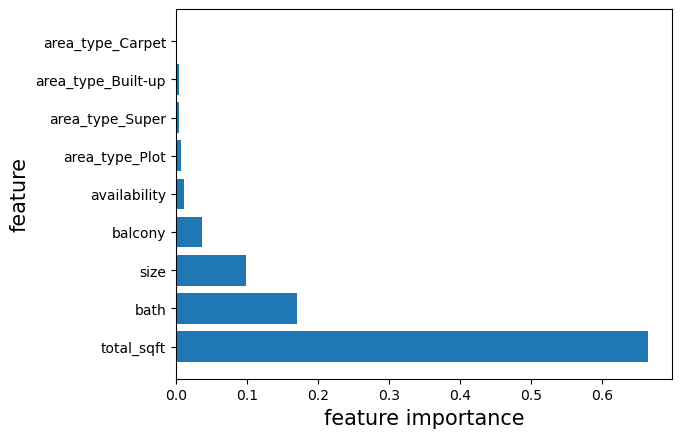

In [48]:
# 변수 중요도 확인
importances = pd.DataFrame(rf.feature_importances_)
feature_importances = pd.concat([pd.DataFrame(X.columns), importances], axis = 1)
feature_importances.columns = ['col_names', 'feature_importance']
feature_importances = feature_importances.sort_values(by = 'feature_importance', ascending= False).reset_index(drop = True)
print(feature_importances)

plt.barh(feature_importances['col_names'], feature_importances['feature_importance'], align = 'center')
plt.xlabel('feature importance', size = 15)
plt.ylabel('feature', size = 15)
plt.show()

# 랜덤포레스트 모델로 학습하였을 때의 변수중요도를 확인하였다.
# 큰 중요도 순으로 total_sqft, bath, size 순으로 

### 비지도 학습 알고리즘

1. 다음은 신용 카드 사용자 데이터이다. 데이터는 신용카드 사용 행태를 나타내는 입력 변수들 구성되어 있다. 2개의 군집 분석 알고리즘으로 각각 군집을 생성하고 군집 생성 과정을 설명하시오.

In [49]:
data = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice10_credit_card.csv')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_TRX
0,C10001,40.900749,0.818182,95.40,0.166667,2
1,C10002,3202.467416,0.909091,0.00,0.000000,0
2,C10003,2495.148862,1.000000,773.17,1.000000,12
3,C10004,1666.670542,0.636364,1499.00,0.083333,1
4,C10005,817.714335,1.000000,16.00,0.083333,1
...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,1.000000,6
8946,C19187,19.183215,1.000000,300.00,1.000000,6
8947,C19188,23.398673,0.833333,144.40,0.833333,5
8948,C19189,13.457564,0.833333,0.00,0.000000,0


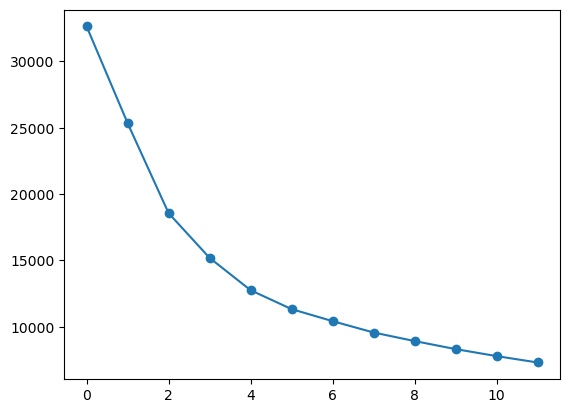

2 0.3384023588407096
3 0.38967496357569636
4 0.42167361399160724
5 0.4318013566586818
6 0.4363021655084281
7 0.41853645195346145
8 0.4182352165959075
9 0.4035293941073236
10 0.3854344748501208
11 0.3869698772864939
12 0.3529900043938351
13 0.34935761612434024


,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_TRX,cluster
0,-0.731989,-0.249434,-0.424900,-0.806490,-0.511333,1
1,0.786961,0.134325,-0.469552,-1.221758,-0.591796,1
2,0.447135,0.518084,-0.107668,1.269843,-0.109020,0
3,0.049099,-1.016953,0.232058,-1.014125,-0.551565,2
4,-0.358775,0.518084,-0.462063,-1.014125,-0.551565,1
...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,1.269843,-0.350408,0
8946,-0.742423,0.518084,-0.329136,1.269843,-0.350408,0
8947,-0.740398,-0.185477,-0.401965,0.854576,-0.390639,0
8948,-0.745174,-0.185477,-0.469552,-1.221758,-0.591796,1


In [71]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score

df = data.drop(['CUST_ID'], axis = 1)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled= pd.DataFrame(df_scaled, columns = df.columns)

# 적절한 군집개수 구하기
I = [] # 오차제곱합
sil = []
for k in range(2, 14):
    kmeans = KMeans(n_clusters=k).fit(df_scaled)
    sil.append(silhouette_score(df_scaled, kmeans.labels_))
    I.append(kmeans.inertia_)

plt.plot(I, marker = 'o')
plt.show()

for i, score in enumerate(sil):
    print(i+2, score)
# 엘보우 방법으로 평평해지기 시작하는 군집의 개수를 보면 4개이다.
# 최적의 군집은 6개이다.

kmeans = KMeans(n_clusters=6).fit(df_scaled)
kmeans_df = df_scaled.copy()
kmeans_df['cluster'] = kmeans.labels_
kmeans_df

In [76]:
eps_list = [0.5, 0.8, 1]

for eps in eps_list:
    db = DBSCAN(eps = eps, min_samples=5).fit(df_scaled)
    temp_df = df_scaled.copy()
    temp_df['label'] = db.labels_
    
    print(silhouette_score(df_scaled, db.labels_))

# eps = 1 일 때 성능이 가장 좋다.

db = DBSCAN(eps = 1, min_samples=5).fit(df_scaled)
db_df = df_scaled.copy()
db_df['cluster'] = db.labels_
db_df

0.2172669025866029
0.662504182668745
0.7154365694706621


,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_TRX,cluster
0,-0.731989,-0.249434,-0.424900,-0.806490,-0.511333,0
1,0.786961,0.134325,-0.469552,-1.221758,-0.591796,0
2,0.447135,0.518084,-0.107668,1.269843,-0.109020,0
3,0.049099,-1.016953,0.232058,-1.014125,-0.551565,0
4,-0.358775,0.518084,-0.462063,-1.014125,-0.551565,0
...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,1.269843,-0.350408,0
8946,-0.742423,0.518084,-0.329136,1.269843,-0.350408,0
8947,-0.740398,-0.185477,-0.401965,0.854576,-0.390639,0
8948,-0.745174,-0.185477,-0.469552,-1.221758,-0.591796,0


K-means 클러스터링
+ scree plot 으로 평평해지는 곳을 찾아서 최적의 군집 수를 일차적으로 확인하고 실루엣 계수를 이용해 가장 큰 값이 나온 군집 수를 최적의 군집수라고 판단했다.

DBSCAN
+ 파라미터인 eps 의 후보군을 3개정도 정하고 3개를 각각 실루엣 계수를 구해서 가장 크게 나온 eps 를 설정하여 군집을 생성하였다.

2. 두 모델을 비교하고 더 타당한 모델을 선택하시오.

In [77]:
db_df.cluster.value_counts()

cluster
 0    8846
-1     104
Name: count, dtype: int64

In [78]:
kmeans_df.cluster.value_counts()

cluster
0    3267
1    2990
2    1390
4     786
3     488
5      29
Name: count, dtype: int64

DBSCAN 에서 군집 비율의 차이가 크게 나므로 keams 알고리즘을 사용한 모델이 더 타당하다고 판단된다.

3. 선택한 모델로 생성한 군집들의 고객 특성을 분석하시오.

In [82]:
df['cluster'] = kmeans_df['cluster']
df.groupby('cluster').median()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_TRX
cluster,,,,,
0,416.729679,1.000000,878.520,0.916667,16.0
1,1233.290231,1.000000,26.900,0.083333,1.0
2,26.610642,0.363636,157.725,0.166667,3.0
3,2329.875976,1.000000,4910.170,1.000000,75.0
4,5813.319845,1.000000,212.225,0.166667,2.0
5,4010.621974,1.000000,22746.810,1.000000,136.0


+ 거래를 가장 많이하고 구매액, 계좌 잔액이 가장 큰 군집은 5번 군집이다.
+ 변수별 가장 큰 군집과 작은 군집을 설명하는 것으로 적자.

4. 고객 특성이 다음과 같다면 어느 군집으로 분류하는 것이 타당한 지 서술하시오.

BALANCE : 3000, BALANCE_FREQUENCY : 1, PURCHASES : 6000, PURCHASES_FREQUENCY : 1, PURCHASES_TRX : 100

3번 군집이 타당해보인다.

5. 각 군집들을 대상으로 마케팅 전략을 수립하시오.

### 시계열